### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


### Reading relevant datasets

In [4]:
bracket_training = pd.read_csv('bracket_training.csv')
bracket_test = pd.read_csv('bracket_test.csv')
institutions = pd.read_csv('CCAC 2025 - Institutions.csv')

In [24]:
bracket_training.head()

,CustomerID,CustomerAreaCode,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,RegionWinner_West,RegionWinner_South,RegionWinner_Midwest,SemifinalWinner_East_West,SemifinalWinner_South_Midwest,NationalChampion
0,47028,NaN,36093,32.5622,-86.0994,698.0,MONTGOMERY (SELMA),2021-12-25,1723503,2024-03-19 10:27:15 -0400,164,29,317,694,164,694,694
1,3511,616.0,49464,42.8256,-86.0104,563.0,GRAND RAPIDS - KALMZOO - B. CRK,2021-04-02,963479,2024-03-18 10:16:39 -0400,164,51,334,328,164,334,164
2,58445,703.0,22210,38.8808,-77.1129,511.0,"WASHINGTON, DC (HAGRSTWN)",2021-04-02,810038,2024-03-18 00:21:47 -0400,164,51,288,559,164,559,559
3,28833,NaN,78218,29.4969,-98.4032,641.0,SAN ANTONIO,2023-11-16,3384825,2024-03-21 10:28:56 -0400,311,610,490,559,311,490,490
4,37899,NaN,14212,42.8946,-78.8245,514.0,BUFFALO,2022-03-16,2828017,2024-03-20 20:14:52 -0400,37,457,387,169,457,387,457


In [25]:
bracket_test.head()

,CustomerID,CustomerAreaCode,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,RegionWinner_West,RegionWinner_South,RegionWinner_Midwest
0,73662,919.0,27539,35.7225,-78.8408,560.0,RALEIGH - DURHAM (FAYETVLLE),3/29/20,2074118,3/19/24 18:50,164,457,288,559
1,6679,360.0,97206,45.4840,-122.5973,820.0,"PORTLAND, OR",4/2/24,2692634,3/20/24 16:56,164,457,193,328
2,63024,270.0,42754,37.4603,-86.3249,529.0,LOUISVILLE,12/8/21,1252684,3/18/24 15:13,311,29,334,169
3,60371,206.0,98178,47.4924,-122.2359,819.0,SEATTLE - TACOMA,3/22/23,1950205,3/19/24 15:21,164,457,288,559
4,18415,717.0,19038,40.1096,-75.1550,504.0,PHILADELPHIA,2/20/24,2756293,3/20/24 18:40,164,457,387,169


In [26]:
institutions.head()

,InstitutionID,InstitutionName,InstitutionNickname,InstitutionAbbreviation,InstitutionCity,InstitutionState,InstitutionPostalCode,InstitutionDMACode,InstitutionDMADescription,InstitutionLatitude,InstitutionLongitude,InstitutionConference,InstitutionEnrollment_Male,InstitutionEnrollment_Female,InstitutionEnrollment_Total,InstitutionNCAAMemberSinceDate,RegularSeasonWins,RegularSeasonLosses,RegularSeasonAverageAttendance,RegularSeasonAverageScore
0,626,San Diego St.,Aztecs,SDSU,San Diego,CA,92182,825,SAN DIEGO,32.77525,-117.07120,Mountain West Conference,11992,16456,28448,09/01/1947,24,10,9832.94,74.59
1,402,McNeese,Cowboys,MCNEES,Lake Charles,LA,70609,643,LAKE CHARLES,30.17819,-93.21722,Southland Conference,2245,3462,5707,09/01/1965,30,3,3085.58,80.42
2,648,South Carolina,Gamecocks,SO CAR,Columbia,SC,29208,546,"COLUMBIA, SC",33.99679,-81.02693,Southeastern Conference,11273,14774,26047,09/01/1936,26,7,11865.45,72.03
3,175,Dayton,Flyers,DAY,Dayton,OH,45469-1230,542,DAYTON,39.73955,-84.17611,Atlantic 10 Conference,4245,3872,8117,09/01/1951,24,8,9187.23,74.74
4,317,James Madison,Dukes,JMU,Harrisonburg,VA,22807,569,HARRISONBURG,38.43631,-78.87048,Sun Belt Conference,8342,12004,20346,09/01/1969,31,3,4471.35,84.35


### EDA

EDA required on bracket training and institutions

In [27]:
bracket_training.shape

(130002, 17)

#### Column names

In [28]:
bracket_training.columns

Index(['CustomerID', 'CustomerAreaCode', 'CustomerPostalCode',
       'CustomerPostalCodeLatitude', 'CustomerPostalCodeLongitude',
       'CustomerDMACode', 'CustomerDMADescription',
       'NCAACustomerRecordCreated', 'BracketEntryId',
       'BracketEntryCreatedDate', 'RegionWinner_East', 'RegionWinner_West',
       'RegionWinner_South', 'RegionWinner_Midwest',
       'SemifinalWinner_East_West', 'SemifinalWinner_South_Midwest',
       'NationalChampion'],
      dtype='object')

#### Nulls

In [29]:
bracket_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130002 entries, 0 to 130001
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CustomerID                     130002 non-null  int64  
 1   CustomerAreaCode               65962 non-null   float64
 2   CustomerPostalCode             130002 non-null  object 
 3   CustomerPostalCodeLatitude     129350 non-null  float64
 4   CustomerPostalCodeLongitude    129350 non-null  float64
 5   CustomerDMACode                129216 non-null  float64
 6   CustomerDMADescription         129216 non-null  object 
 7   NCAACustomerRecordCreated      130002 non-null  object 
 8   BracketEntryId                 130002 non-null  int64  
 9   BracketEntryCreatedDate        130002 non-null  object 
 10  RegionWinner_East              130002 non-null  int64  
 11  RegionWinner_West              130002 non-null  int64  
 12  RegionWinner_South            

#### Columns Containing Nulls

| **Column Name**                   | **Non-Null Count** | **Data Type** |**Comments**          |
|:----------------------------------|:-------------------|:--------------|:---------------------|
| CustomerAreaCode                  | 65,962             | float64       | -> Column of concern |
| CustomerPostalCodeLatitude        | 129,350            | float64       | -> Same number of nulls: Makes sense|
| CustomerPostalCodeLongitude       | 129,350            | float64       |^|
| CustomerDMACode                   | 129,216            | float64       | -> Same number of nulls: Makes sense|
| CustomerDMADescription            | 129,216            | object        |^|

No point looking at this statistically. More or less entire dataset is categorical

In [30]:
bracket_training.describe()

,CustomerID,CustomerAreaCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,BracketEntryId,RegionWinner_East,RegionWinner_West,RegionWinner_South,RegionWinner_Midwest,SemifinalWinner_East_West,SemifinalWinner_South_Midwest,NationalChampion
count,130002.000000,65962.000000,129350.000000,129350.000000,129216.000000,1.300020e+05,130002.000000,130002.000000,130002.000000,130002.000000,130002.000000,130002.000000,130002.000000
mean,41034.091099,570.709014,38.905530,-90.866698,616.846869,1.967702e+06,196.434386,228.310811,332.280703,479.662051,207.587491,394.577491,291.223173
std,23711.245205,231.527334,4.622004,13.541790,100.722679,1.058548e+06,115.092600,233.653791,113.758755,193.316550,160.075165,165.339341,183.819747
min,1.000000,201.000000,19.526100,-165.406400,500.000000,5.000000e+00,9.000000,8.000000,157.000000,5.000000,8.000000,5.000000,5.000000
25%,20468.250000,385.000000,35.681300,-96.654175,527.000000,1.054216e+06,164.000000,29.000000,288.000000,260.000000,77.000000,288.000000,164.000000
50%,40962.500000,571.000000,39.955900,-87.736200,605.000000,2.026418e+06,164.000000,51.000000,288.000000,559.000000,164.000000,334.000000,288.000000
75%,61489.000000,781.000000,41.905000,-81.438500,673.000000,2.913240e+06,301.000000,457.000000,334.000000,648.000000,311.000000,559.000000,444.000000
max,82136.000000,996.000000,64.947500,3.831000,881.000000,3.839316e+06,813.000000,1104.000000,796.000000,731.000000,1104.000000,796.000000,1104.000000


#### Date Range

In [42]:
bracket_entry_date_range = (bracket_training['BracketEntryCreatedDate'].min(), bracket_training['BracketEntryCreatedDate'].max())
print(f"Bracket Entry Created Date Range: {bracket_entry_date_range[0]} to {bracket_entry_date_range[1]}")

customer_record_date_range = (bracket_training['NCAACustomerRecordCreated'].min(), bracket_training['NCAACustomerRecordCreated'].max())
print(f"Customer Record Date Range: {customer_record_date_range[0]} to {customer_record_date_range[1]}")

Bracket Entry Created Date Range: 2024-02-08 11:31:20 -0500 to 2024-04-07 17:33:50 -0400
Customer Record Date Range: 2007-10-30 to 2024-12-06


#### Merging bracket_training and institution dataframes

In [89]:
# List of columns containing institution IDs
id_columns = [
    'RegionWinner_East', 
    'RegionWinner_West', 
    'RegionWinner_South', 
    'RegionWinner_Midwest', 
    'SemifinalWinner_East_West', 
    'SemifinalWinner_South_Midwest', 
    'NationalChampion'
]

# Create a copy to avoid modifying the original DataFrame
bracket_training_names = bracket_training.copy()

# Replace ID columns with institution names
for col in id_columns:
    bracket_training_names[col] = bracket_training_names[col].map(
        institutions.set_index('InstitutionID')['InstitutionName']
    )

# Display the updated DataFrame
bracket_training_names.head()

,CustomerID,CustomerAreaCode,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,RegionWinner_West,RegionWinner_South,RegionWinner_Midwest,SemifinalWinner_East_West,SemifinalWinner_South_Midwest,NationalChampion
0,47028,NaN,36093,32.5622,-86.0994,698.0,MONTGOMERY (SELMA),2021-12-25,1723503,2024-03-19 10:27:15 -0400,UConn,Arizona,James Madison,Tennessee,UConn,Tennessee,Tennessee
1,3511,616.0,49464,42.8256,-86.0104,563.0,GRAND RAPIDS - KALMZOO - B. CRK,2021-04-02,963479,2024-03-18 10:16:39 -0400,UConn,Baylor,Kentucky,Kansas,UConn,Kentucky,UConn
2,58445,703.0,22210,38.8808,-77.1129,511.0,"WASHINGTON, DC (HAGRSTWN)",2021-04-02,810038,2024-03-18 00:21:47 -0400,UConn,Baylor,Houston,Purdue,UConn,Purdue,Purdue
3,28833,NaN,78218,29.4969,-98.4032,641.0,SAN ANTONIO,2023-11-16,3384825,2024-03-21 10:28:56 -0400,Iowa St.,Saint Mary's,NC State,Purdue,Iowa St.,NC State,NC State
4,37899,NaN,14212,42.8946,-78.8245,514.0,BUFFALO,2022-03-16,2828017,2024-03-20 20:14:52 -0400,Auburn,North Carolina,Marquette,Creighton,North Carolina,Marquette,North Carolina


In [91]:
bracket_training_names.to_csv('bracket_training_with_names.csv')

In [93]:
# List of columns containing institution IDs
id_columns = [
    'RegionWinner_East', 
    'RegionWinner_West', 
    'RegionWinner_South', 
    'RegionWinner_Midwest'
]

# Create a copy to avoid modifying the original DataFrame
bracket_test_names = bracket_test.copy()

# Replace ID columns with institution names
for col in id_columns:
    bracket_test_names[col] = bracket_test_names[col].map(
        institutions.set_index('InstitutionID')['InstitutionName']
    )

# Display the updated DataFrame
bracket_test_names.head()

,CustomerID,CustomerAreaCode,CustomerPostalCode,CustomerPostalCodeLatitude,CustomerPostalCodeLongitude,CustomerDMACode,CustomerDMADescription,NCAACustomerRecordCreated,BracketEntryId,BracketEntryCreatedDate,RegionWinner_East,RegionWinner_West,RegionWinner_South,RegionWinner_Midwest
0,73662,919.0,27539,35.7225,-78.8408,560.0,RALEIGH - DURHAM (FAYETVLLE),3/29/20,2074118,3/19/24 18:50,UConn,North Carolina,Houston,Purdue
1,6679,360.0,97206,45.4840,-122.5973,820.0,"PORTLAND, OR",4/2/24,2692634,3/20/24 16:56,UConn,North Carolina,Duke,Kansas
2,63024,270.0,42754,37.4603,-86.3249,529.0,LOUISVILLE,12/8/21,1252684,3/18/24 15:13,Iowa St.,Arizona,Kentucky,Creighton
3,60371,206.0,98178,47.4924,-122.2359,819.0,SEATTLE - TACOMA,3/22/23,1950205,3/19/24 15:21,UConn,North Carolina,Houston,Purdue
4,18415,717.0,19038,40.1096,-75.1550,504.0,PHILADELPHIA,2/20/24,2756293,3/20/24 18:40,UConn,North Carolina,Marquette,Creighton


In [94]:
bracket_test_names.to_csv('bracket_test_with_names.csv')

#### Frequency Bar Plot: Region Winners, Semifinals, Nationals 

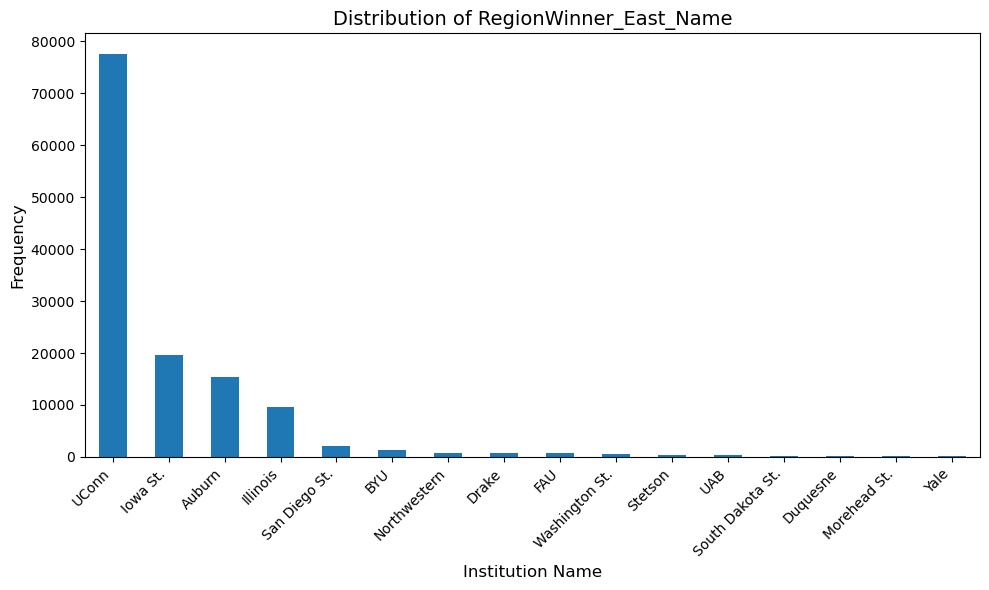

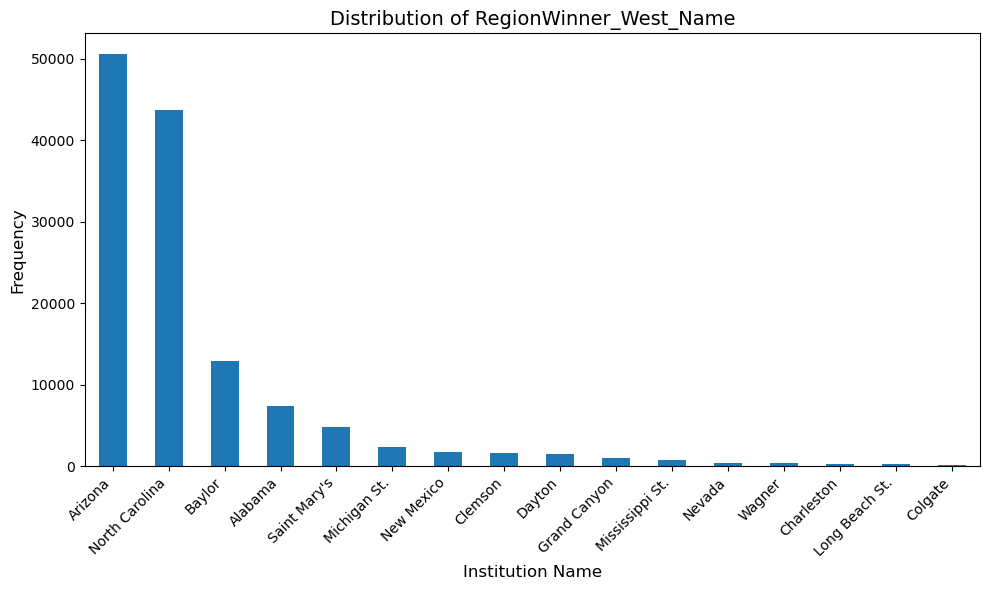

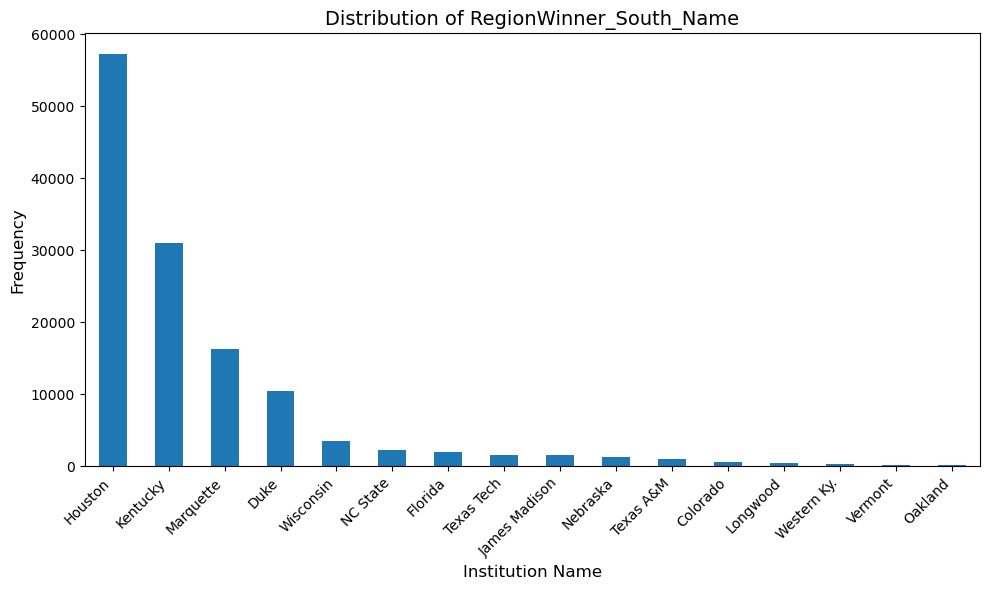

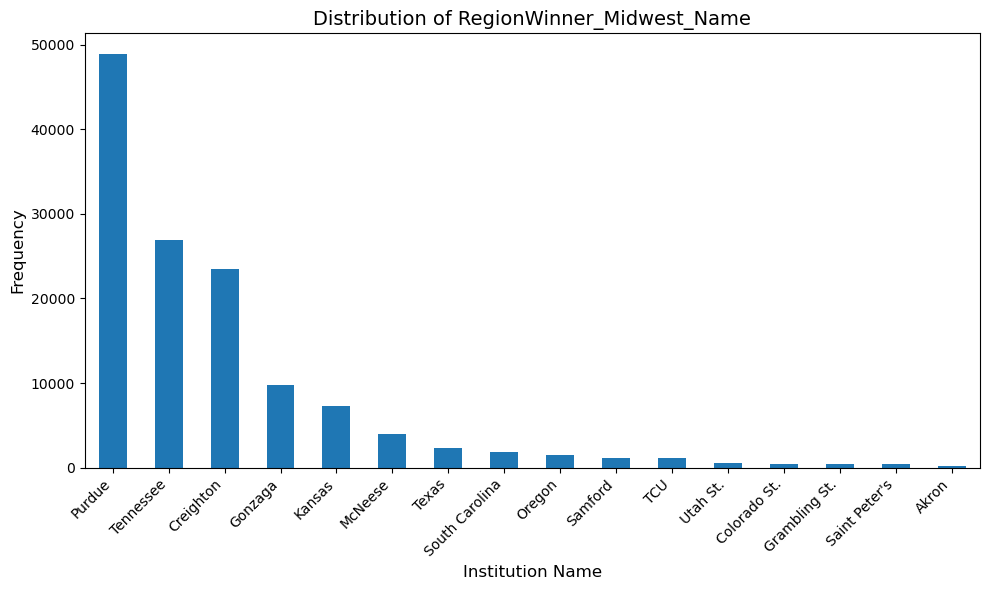

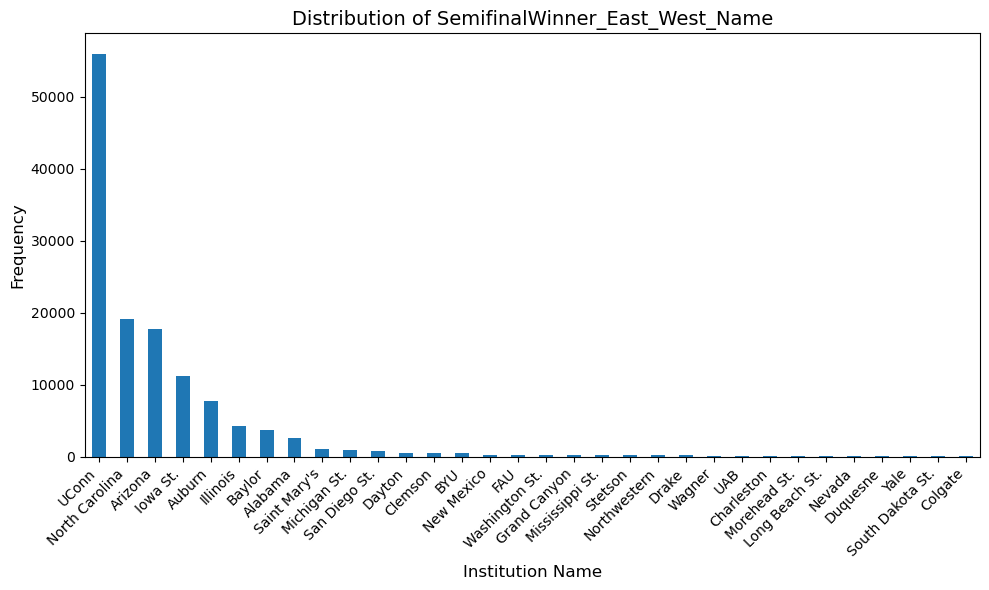

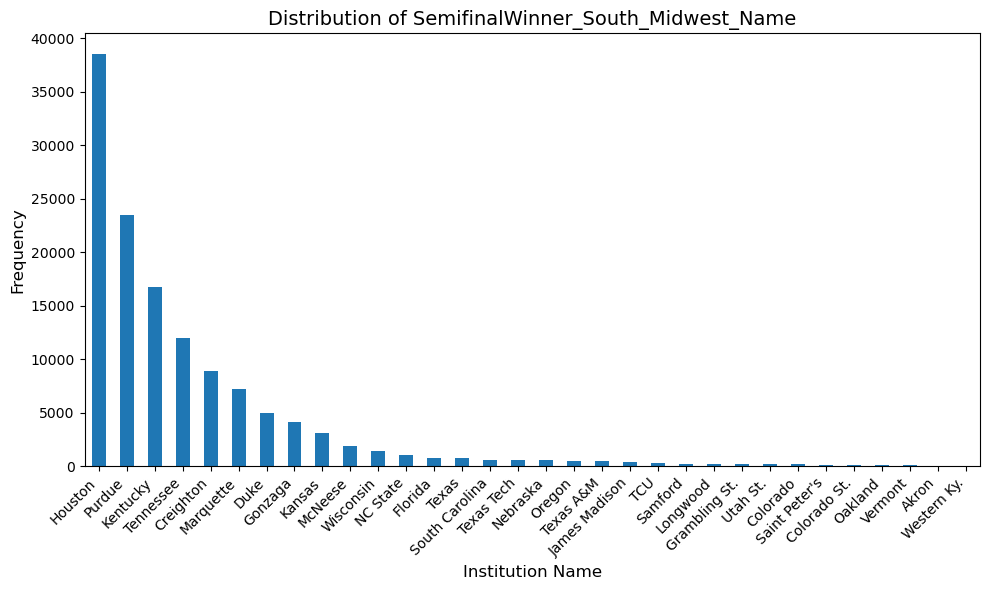

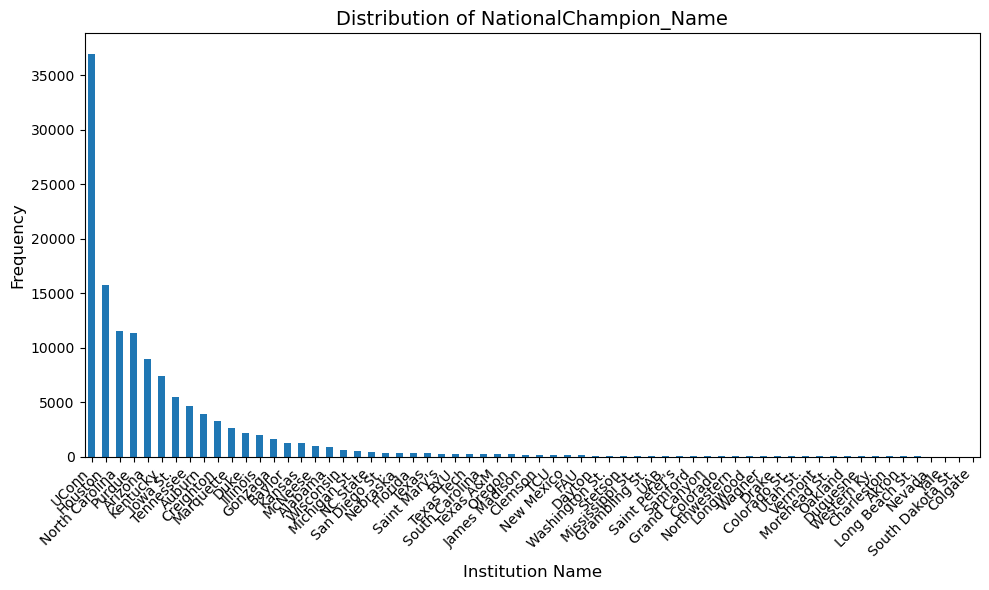

In [35]:
for col in id_columns:
    name_col = f'{col}_Name'  # Corresponding name column
    
    # Check if the name column exists
    if name_col in bracket_training.columns:
        # Plotting the value counts as a bar plot
        plt.figure(figsize=(10, 6))
        bracket_training[name_col].value_counts().plot(kind='bar')
        
        # Adding titles and labels for clarity
        plt.title(f'Distribution of {name_col}', fontsize=14)
        plt.xlabel('Institution Name', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()